In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [8]:
!pip install torchmetrics
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 24.8 MB/s eta 0:00:00


In [2]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1f34595521348430939d93ceff8f4da01535051145af1b807a4d4ebb077dd185
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [3]:
!pip install kaggle --quiet
!pip install torchvision transformers --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.6 MB/s eta 0:00:00


In [4]:
#Copiar la dataset de kaggle
import kagglehub

# Download latest version
path_data = kagglehub.dataset_download("gunavenkatdoddi/eye-diseases-classification")

print("Path to dataset files:", path_data)

Path to dataset files: /kaggle/input/eye-diseases-classification


# MODELO DE HUGGING FACE

In [69]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import requests
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
from torchvision.transforms.functional import to_pil_image
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np

In [6]:
#Modelo preentrenado de hugging face:
processor = AutoImageProcessor.from_pretrained("NeuronZero/EyeDiseaseClassifier")
model = AutoModelForImageClassification.from_pretrained("NeuronZero/EyeDiseaseClassifier")
#Para ver su estructura interna (capas):
print(model)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/781 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `BeitImageProcessor.__init__` and were ignored: '_valid_processor_keys'
  return func(*args, **kwargs)


config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

BeitForImageClassification(
  (beit): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): BeitPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (relative_position_bias): BeitRelativePositionBias()
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          

ETIQUETAS: cataratas=0, diabetic_retinopathy=1, glaucoma=2, normal=3

In [83]:
#normalizar las imagenes porque el modelo trabaja con imagenes de 224x224
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

#ruta del dataset = path_data
dataset_path = "/kaggle/input/eye-diseases-classification/dataset"
#cargar dataset con etiquetas automáticas por carpeta
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
#print(dataset.classes)
#model.eval()
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
# Obtener un batch del dataloader
image_tensor, label = next(iter(dataloader))
print(label)
'''dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
# Probar cargando una imagen
image_tensor, label = next(iter(dataloader))
print("Shape:", image_tensor.shape)
print("Etiqueta:", label)'''

tensor([2])


'dataloader = DataLoader(dataset, batch_size=1, shuffle=True)\n# Probar cargando una imagen\nimage_tensor, label = next(iter(dataloader))\nprint("Shape:", image_tensor.shape)\nprint("Etiqueta:", label)'

MODELO CON NUESTROS DATOS:

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


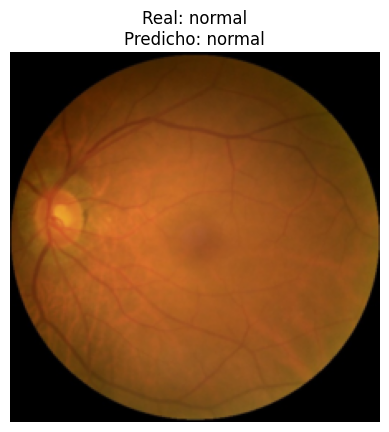

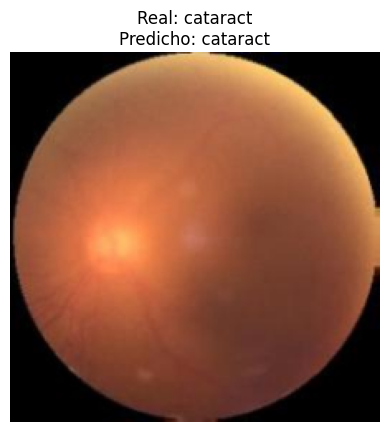

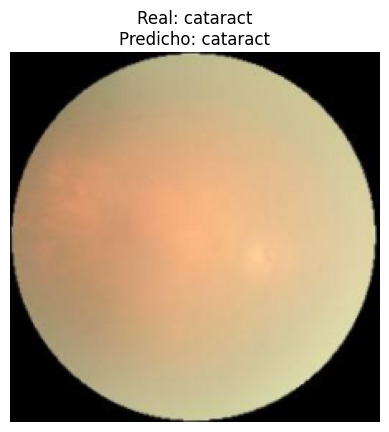

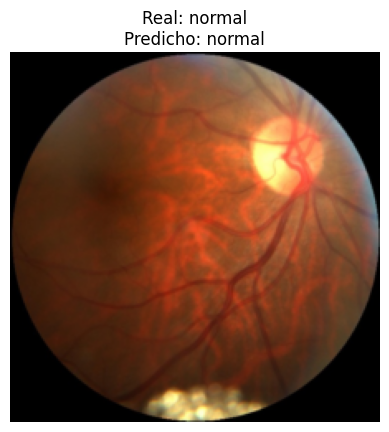

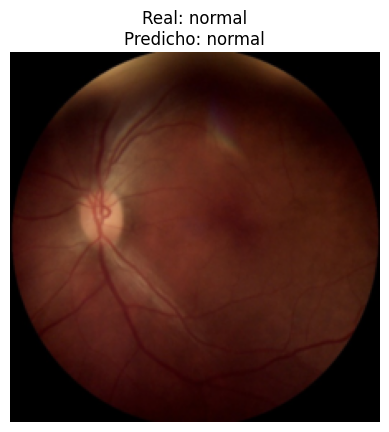

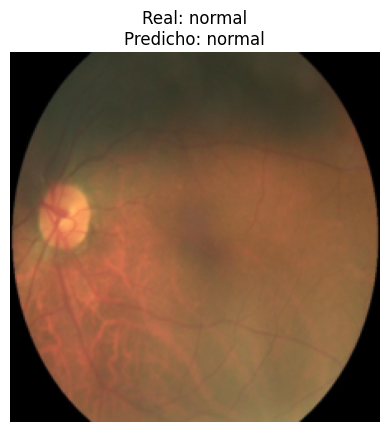

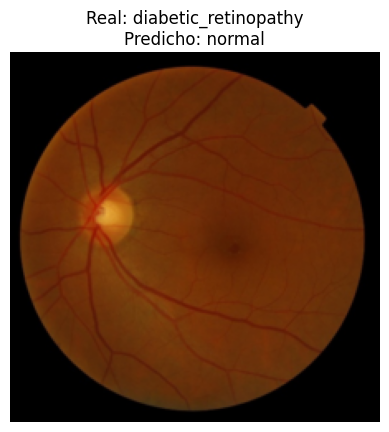

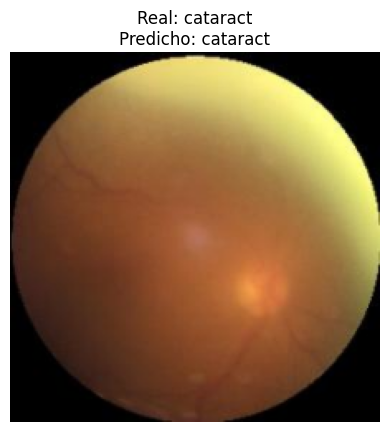

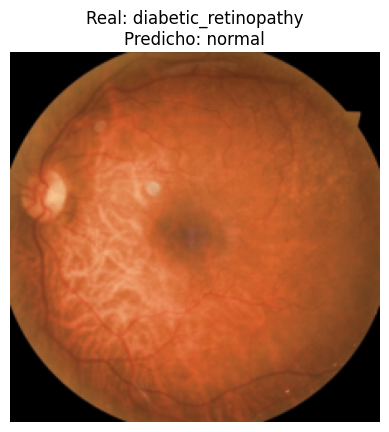

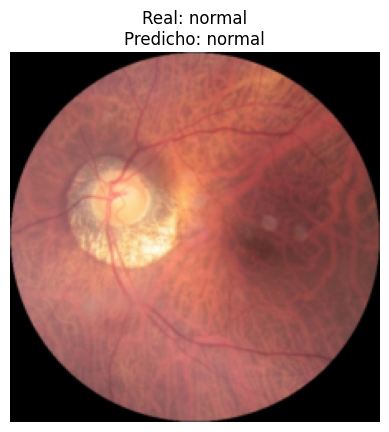


Precisión aproximada en estas 10 imágenes: 8/10


In [44]:
import matplotlib.pyplot as plt
import torch
from torchvision.transforms.functional import to_pil_image

#Clases
idx_to_class = dataset.classes
print(idx_to_class) #['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
N = 10
correctos = 0

for i, (image_tensor, label) in enumerate(dataloader):
    if i >= N:
        break
    # Si es de label diabetic_retinopathy por si acaso pasarlo a jpg
    if label.item() == dataset.class_to_idx['diabetic_retinopathy']:
        image_pil = image_pil.convert("RGB")

    # Convertir a imagen PIL
    image_pil = to_pil_image(image_tensor[0])

    #El modelo predice:
    inputs = processor(images=image_pil, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        pred_idx = outputs.logits.argmax(-1).item()

    # Mostrar imagen y resultados
    plt.imshow(image_pil)
    plt.axis('off')
    plt.title(f"Real: {idx_to_class[label.item()].lower()}\nPredicho: {model.config.id2label[pred_idx].lower()}")
    plt.show()

    # Evaluación rápida
    if idx_to_class[label.item()].lower() in model.config.id2label[pred_idx].lower():
        correctos += 1

print(f"\nPrecisión aproximada en estas {N} imágenes: {correctos}/{N}")


# LIME: Explicabilidad del modelo con una imagen


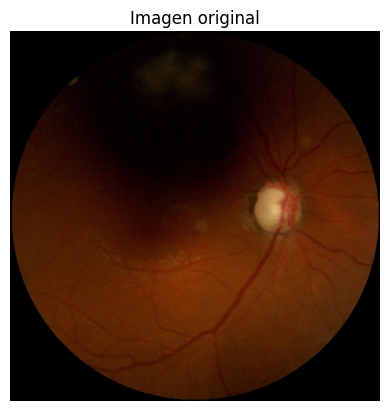

In [95]:
#path_to_image = "/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy/10007_left.jpeg"
path_to_image = "/kaggle/input/eye-diseases-classification/dataset/glaucoma/1209_right.jpg"
image = Image.open(path_to_image).convert("RGB")
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.title("Imagen original")
plt.show()

In [96]:
# Procesar y predecir
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    pred_idx = outputs.logits.argmax(-1).item()
#predict_fn = model.config.id2label[pred_idx]
# Ver resultado
print("Predicción:", model.config.id2label[pred_idx].lower())


Predicción: glaucoma


In [97]:
def predict_fn(images_np):
    images_pil = [Image.fromarray((img * 255).astype(np.uint8)) for img in images_np]
    inputs = processor(images=images_pil, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return probs.numpy()

In [98]:
explainer = lime_image.LimeImageExplainer()

In [99]:
explanation = explainer.explain_instance(
    np.array(image.resize((224, 224))) / 255.0,
    classifier_fn=predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000  # puedes ajustar esto
)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [101]:
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True, #solo los que contribuyen postitivamente
    num_features=10, #cantidad de superpixeles que contribuyen
    hide_rest=False, #ocultar el resto
    min_weight=0.0
)

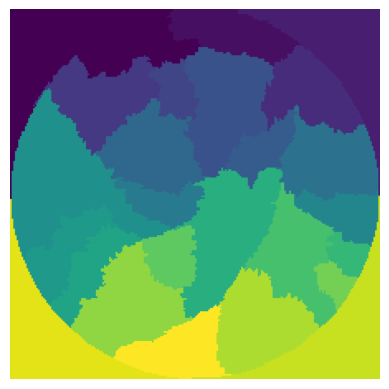

In [102]:
plt.imshow(explanation.segments)
plt.axis('off')
plt.show()

In [103]:
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True, #solo los que contribuyen postitivamente
    num_features=10, #cantidad de superpixeles que contribuyen
    hide_rest=True, #ocultar el resto
)

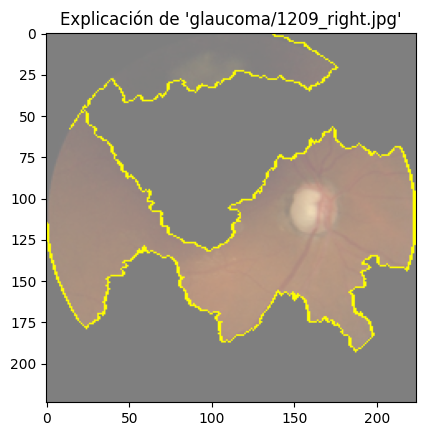

In [105]:
plt.figure()
plt.title("Explicación de 'glaucoma/1209_right.jpg'")
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

# Metricas de evaluación del modelo:

In [ ]:
#F1